In [1]:
#import necessary packages

#our workhorses
import numpy as np
import pandas as pd
import scipy

#to visualize
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
#style params for figures
sns.set(font_scale = 2)
plt.style.use('seaborn-white')
plt.rc("axes", labelweight="bold")
from IPython.display import display, HTML

#to load files
import os
import h5py

#for stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multitest as multitest
import statsmodels.stats.multicomp


#import cusotm functions
from EMG_gestures.utils import *

In [2]:
nsubjects = 36

lr_results_df = [] 

results_folder = '../results_data/single_subject_training/log_reg'
for src_subject_id in range(1,nsubjects+1):
    results_fn = 'subject_%02d_within_subject_results.h5'%(src_subject_id)
    subject_df = pd.read_hdf(os.path.join(results_folder,results_fn), 'results_df')
    subject_df['Train_Subject'] = subject_df['Subject']
    subject_df['Test_Subject'] = subject_df['Subject']
    subject_df.drop(columns = ['Subject'])
    lr_results_df.append(subject_df)

lr_results_df = pd.concat(lr_results_df,axis = 0)

# Average over multiple train/test splits of the data
lr_results_df = lr_results_df.groupby(['Shuffled','Type','Train_Subject','Test_Subject'],as_index = False)\
.mean()\
.drop(columns = ['Fold','Rep'])

# Output summary
display(HTML(lr_results_df.groupby(['Shuffled','Type']).mean().drop(columns = ['Train_Subject','Test_Subject']).to_html()))

In [3]:
lr_results_df.head()

,Shuffled,Type,Train_Subject,Test_Subject,Subject,f1_score,accuracy_score
0,False,Test,1,1,1.0,0.819340,0.820363
1,False,Test,2,2,2.0,0.875996,0.892816
2,False,Test,3,3,3.0,0.905857,0.907666
3,False,Test,4,4,4.0,0.894892,0.896475
4,False,Test,5,5,5.0,0.940613,0.941624


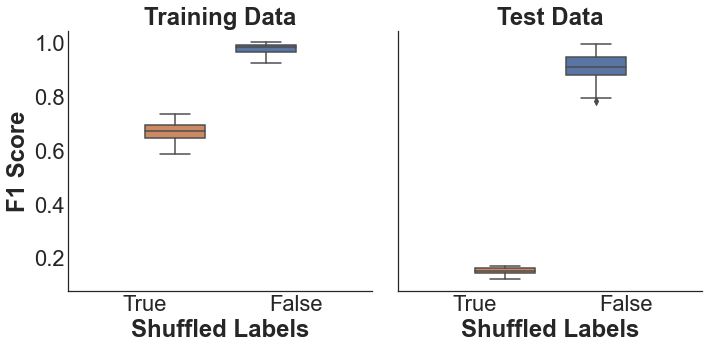

In [4]:
#Visualize results
g = sns.catplot(data = lr_results_df, x= 'Shuffled', y = 'f1_score', hue = 'Shuffled',\
            col = 'Type',kind = 'box', order = [True,False], col_order = ['Train','Test'])
#Label axes and subpots
for ax in g.axes[0]:
    ax.set_xlabel('Shuffled Labels')
g.axes[0][0].set_ylabel('F1 Score')
g.axes[0][0].set_title('Training Data',fontweight = 'bold');
g.axes[0][1].set_title('Test Data',fontweight = 'bold');

In [6]:
# Load logistic regression across-subject data

nsubjects = 36

lr_xsubj_results_df = [] 

results_folder = '../results_data/single_subject_training/log_reg'
for src_subject_id in range(1,nsubjects+1):
    results_fn = 'subject_%02d_across_subject_results.h5'%(src_subject_id)
    subject_df = pd.read_hdf(os.path.join(results_folder,results_fn), 'results_df')
    lr_xsubj_results_df.append(subject_df)

lr_xsubj_results_df = pd.concat(lr_xsubj_results_df,axis = 0)

# Average over test subjects
lr_xsubj_results_df = lr_xsubj_results_df.groupby(['Shuffled','Type','Train_Subject'],as_index = False)\
.mean()\
.drop(columns = ['Test_Subject','Rep'])

# Output summary
display(HTML(lr_xsubj_results_df.groupby(['Shuffled','Type']).mean().drop(columns = ['Train_Subject']).to_html()))

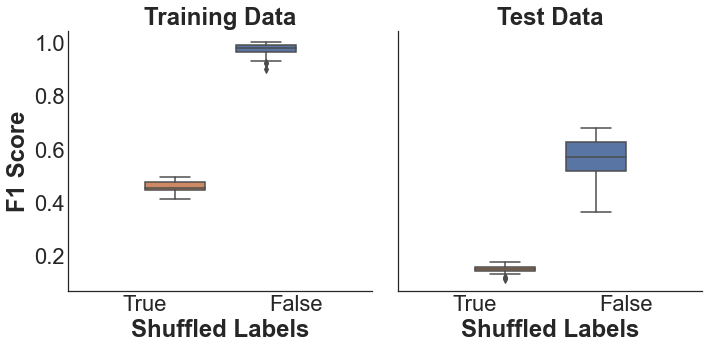

In [7]:
#Visualize results
g = sns.catplot(data = lr_xsubj_results_df, x= 'Shuffled', y = 'f1_score', hue = 'Shuffled',\
            col = 'Type',kind = 'box', order = [True,False], col_order = ['Train','Test'])
#Label axes and subpots
for ax in g.axes[0]:
    ax.set_xlabel('Shuffled Labels')
g.axes[0][0].set_ylabel('F1 Score')
g.axes[0][0].set_title('Training Data',fontweight = 'bold');
g.axes[0][1].set_title('Test Data',fontweight = 'bold');